In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

# Problem 1

### 1.

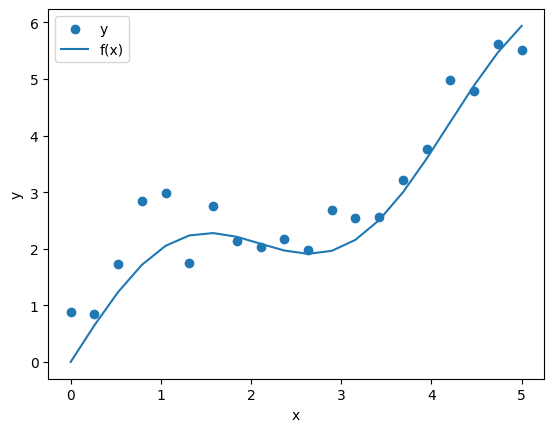

In [3]:
# Define the functions
def f(x):
    return x + np.sin(1.5 * x)

def y(x):
    return f(x) + np.random.normal(0, 0.5, len(x))

# Generate the dataset
np.random.seed(0)
x = np.linspace(0, 5, 20) 
y_data = y(x)

# Plot the dataset and f(x)
plt.scatter(x, y_data, label='y')
plt.plot(x, f(x), label='f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### 2.

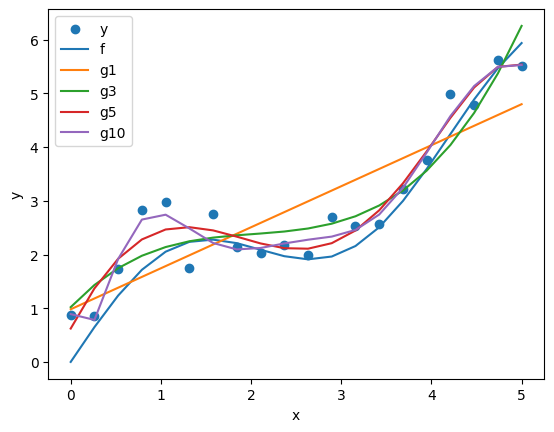

In [4]:
# Define the estimator
def estimator(x, beta):
    n = len(beta) - 1
    x_array = np.array([x ** i for i in range(n+1)]).T
    return x_array @ beta

# Estimate the coefficients
get_betas = partial(np.polyfit, x, y_data)
beta1 = get_betas(1)[::-1]
beta3 = get_betas(3)[::-1]
beta5 = get_betas(5)[::-1]
beta10 = get_betas(10)[::-1]

# Plotting
plt.scatter(x, y_data, label='y')
plt.plot(x, f(x), label='f')
plt.plot(x, estimator(x, beta1), label='g1')
plt.plot(x, estimator(x, beta3), label='g3')
plt.plot(x, estimator(x, beta5), label='g5')
plt.plot(x, estimator(x, beta10), label='g10')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

From the plot above, we can see that $g_1(x)$ estimator is underfitting, while $g_{10}(x)$ estimator is overfitting.

### 3.

Best model polynomial degree is 5.
Squared bias is 0.0109.
Variance is 0.0530.
MSE error on the test set is 0.1477.


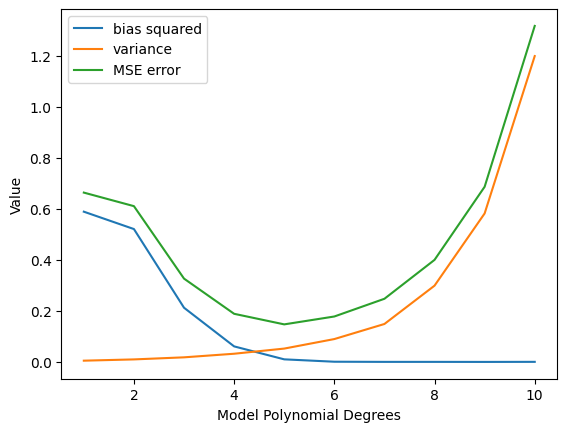

In [18]:
from collections import defaultdict
np.random.seed(124)
n_observations_per_dataset = 50
n_datasets = 100
max_poly_degree = 10  # Maximum model complexity
model_poly_degrees = range(1, max_poly_degree + 1)

NOISE_STD = .3
n_train = 40

# Create training/testing inputs
x = np.linspace(0, 5, n_observations_per_dataset)
x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]

# logging variables
theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

def error_function(pred, actual):
    return (pred - actual) ** 2

# Loop over datasets
for dataset in range(n_datasets):

    # Simulate training/testing targets
    y_train = f(x_train) + NOISE_STD * np.random.randn(*x_train.shape)
    y_test = f(x_test) + NOISE_STD * np.random.randn(*x_test.shape)

    # Loop over model complexities
    for degree in model_poly_degrees:
        # Train model
        tmp_theta_hat = np.polyfit(x_train, y_train, degree)

        # Make predictions on train set
        tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)

        # Test predictions
        tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))


def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)

def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)


complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]
print(f"Best model polynomial degree is {best_model_degree}.")
print(f"Squared bias is {bias_squared[np.argmin(complexity_test_error)]:.4f}.")
print(f"Variance is {variance[np.argmin(complexity_test_error)]:.4f}.")
print(f"MSE error on the test set is {complexity_test_error[np.argmin(complexity_test_error)]:.4f}.")

plt.plot(list(model_poly_degrees), bias_squared, label='bias squared')
plt.plot(list(model_poly_degrees), variance, label='variance')
plt.plot(list(model_poly_degrees), complexity_test_error, label='MSE error')
plt.xlabel('Model Polynomial Degrees')
plt.ylabel('Value')
plt.legend()
plt.show()


From the plot above, we can see that the best model polynomial degree is 5, as it has the lowest test error. The squared bias is 0.0109, the variance is 0.0530, and the test error is 0.1477.

# Problem 2

### 1.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values
print(len(X))

400


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(320, 3)

In [33]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
misclassification_error = 1 - ac
recall = cm[0, 0] / (cm[0, 0] + cm[0, 1])
precision = cm[0, 0] / (cm[0, 0] + cm[1, 0])
f1_score = 2 / ((1 / recall + 1 / precision))
print(f"Misclassification error: {misclassification_error:.2f}.")
print(f"Accuracy: {ac:.2f}.")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"f1 score: {f1_score:.4f}")

Misclassification error: 0.05.
Accuracy: 0.95.
Recall: 0.9483
Precision: 0.9821
f1 score: 0.9649


### 2 & 3.

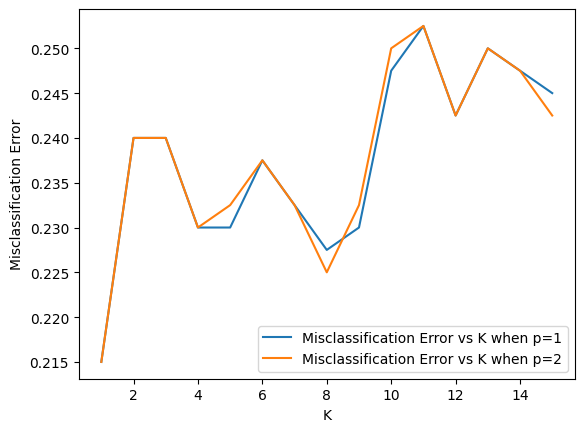

In [40]:
from sklearn.model_selection import cross_val_score

n_neighbours = range(1, 16)
cv_scores = []
cv_scores_eu = []
for k in n_neighbours:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 1)
    knn_eu = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    scores_eu = cross_val_score(knn_eu, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    cv_scores_eu.append(scores_eu.mean())

MSE = np.array([1 - score for score in cv_scores])
MSE_eu = np.array([1 - score for score in cv_scores_eu])
plt.plot(list(n_neighbours), MSE, label='Misclassification Error vs K when p=1')
plt.plot(list(n_neighbours), MSE_eu, label='Misclassification Error vs K when p=2')
plt.xlabel('K')
plt.ylabel('Misclassification Error')
plt.legend()
plt.show()

### 4.

The best value of K with Euclidean distance is 8, and it is the same as when the Manhattan distance is applied. $K=8$ and $p=2$ are the best combination.

# Problem 3

### 1.

For retrieval algorithm 1, 
$TP = 25$,  $FP = 15$,  $FN = 5$,  $TN = 55$. \
Confusion Matrix 1: 
|           | True Value Positive | True Value Negative |
|-----------|-----------|-----------|
| Predicted Positive | 25 | 15 |
| Predicted Negative | 5 | 55 |

For retrieval algorithm 2, 
$TP = 20$,  $FP = 10$,  $FN = 10$,  $TN = 60$.
Confusion Matrix 1: 
|           | True Value Positive | True Value Negative |
|-----------|-----------|-----------|
| Predicted Positive | 20 | 10 |
| Predicted Negative | 10 | 60 |

### 2.

The instructor is correct, which means we should use F1 score as the evaluation metric. The F1-Score is the harmonic mean of precision and recall. It focuses on the balance between precision. F1-Score gives more weight to the positive class (lower recall for the negative class will result in a lower F1-Score), which aligns with the goal to find the algorithm that has better performance on the negative classes.

# Problem 4

### 1.

Penalty: The possible value is 'l1' and 'l2', where 'l1' means L1 (Lasso) regularization and 'l2' means L2 (Ridge) regularization. The penalty parameter specifies the type of regularization to be applied in logistic regression. Regularization helps prevent overfitting by adding a penalty term to the loss function. 

C: The possible value is a positive float, which is the inverse of regularization strength. Smaller values specify stronger regularization. The C parameter controls the trade-off between fitting the training data and finding the decision boundary. Smaller values of C specify stronger regularization. 

Multi-class: The possible value is 'auto', 'ovr', and 'multinomial'. The multi_class parameter specifies the method used to handle multiple classes. The 'ovr' option uses the one-vs-rest strategy, where a binary problem is fit whatever the label is.

Solver: The possible value is 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'. The solver parameter specifies the algorithm to use in the optimization problem. The choice of solver can affect the performance of the model.

### 2.

'l1' means that the penalty is L1 (Lasso) regularization which means applying l1 norm as the penalty term, and 'l2' means that the penalty is L2 (Ridge) regularization which means applying l2 norm as the penalty term. 

### 3.

/Users/gengliyuan/anaconda3/envs/DSUA301/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gengliyuan/anaconda3/envs/DSUA301/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


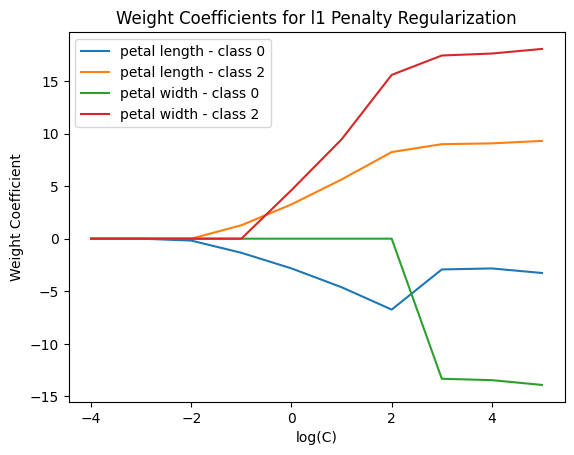

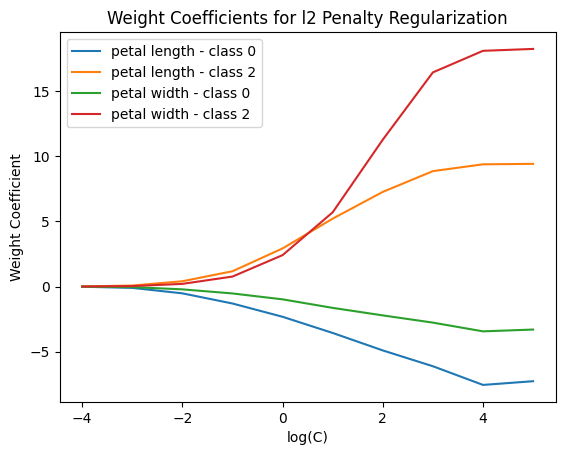

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
iris = load_iris()
X = iris.data  # petal width and petal length
y = iris.target

# Define the values of C
C_values = [10**(-4), 10**(-3), 10**(-2), 10**(-1), 1, 10, 100, 1000, 10000, 100000]

# Define the penalty types
penalties = ['l1', 'l2']

# Fit logistic regression models for each combination of C and penalty
coefs = {}
for penalty in penalties:
    coefs[penalty] = []
    for C in C_values:
        # Fit the logistic regression model
        if penalty == 'l1':
            model = LogisticRegression(penalty=penalty, C=C, multi_class='ovr', solver='liblinear')
        else:
            model = LogisticRegression(penalty=penalty, C=C, multi_class='ovr')
        model.fit(X, y)
        # Collect the weight coefficients for class 0 and 2
        # print(model.coef_[[0, 2], [2, 3]])
        coefs[penalty].append(model.coef_)

# Plot the weight coefficients for different values of C
for penalty in penalties:
    coefs_array = np.array(coefs[penalty])
    plt.figure()
    plt.plot(np.log10(C_values), coefs_array[:, 0, 2], label=f'petal length - class 0')
    plt.plot(np.log10(C_values), coefs_array[:, 2, 2], label=f'petal length - class 2')
    plt.plot(np.log10(C_values), coefs_array[:, 0, 3], label=f'petal width - class 0')
    plt.plot(np.log10(C_values), coefs_array[:, 2, 3], label=f'petal width - class 2')
    plt.xlabel('log(C)')
    plt.ylabel('Weight Coefficient')
    plt.legend()
    plt.title(f'Weight Coefficients for {penalty} Penalty Regularization')
    plt.show()


The general trend are similar for both L1 and L2 regularization. Petal width and petal length coefficients always increase for class 2, while decrease in terms of class 0 with the increasing of C. However, in l1 regularization, the change is more sharp, and all coefficients stay at 0 when C is small. In l2 regularization, the change is more smooth, and all coefficients are non-zero.

### 4.

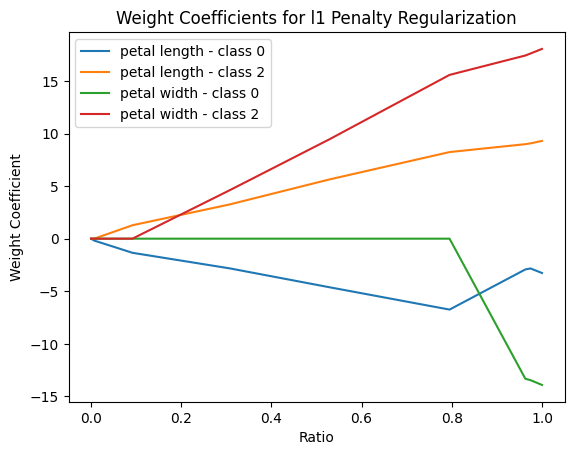

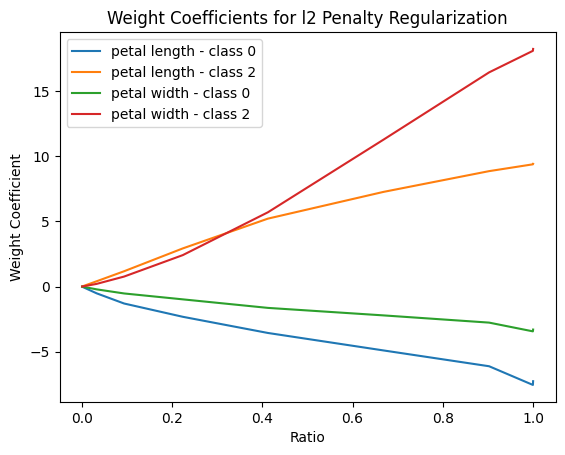

In [73]:
for penalty in penalties:
    coefs_array = np.array(coefs[penalty])
    class_norm = np.linalg.norm(coefs_array, axis=(1,2))
    denominator = np.linalg.norm(coefs_array[-1])
    ratios = class_norm / denominator
    # class_0_norm = np.linalg.norm(coefs_array[:, 0], axis=1)
    # class_2_norm = np.linalg.norm(coefs_array[:, 2], axis=1)
    # denominator_0 = np.linalg.norm(coefs_array[-1, 0])
    # denominator_2 = np.linalg.norm(coefs_array[-1, 2])
    # ratios_0 = class_0_norm / denominator_0
    # ratios_2 = class_2_norm / denominator_2
    plt.figure()
    plt.plot(ratios, coefs_array[:, 0, 2], label=f'petal length - class 0')
    plt.plot(ratios, coefs_array[:, 2, 2], label=f'petal length - class 2')
    plt.plot(ratios, coefs_array[:, 0, 3], label=f'petal width - class 0')
    plt.plot(ratios, coefs_array[:, 2, 3], label=f'petal width - class 2')
    plt.xlabel('Ratio')
    plt.ylabel('Weight Coefficient')
    plt.legend()
    plt.title(f'Weight Coefficients for {penalty} Penalty Regularization')
    plt.show()
